# ACGPN

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/Virtual Dressing/

/content/drive/MyDrive/Virtual Dressing


In [7]:
!git clone https://github.com/levindabhi/ACGPN.git
%cd ACGPN

Cloning into 'ACGPN'...
remote: Enumerating objects: 161, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 161 (delta 20), reused 18 (delta 18), pack-reused 139
Receiving objects: 100% (161/161), 302.85 KiB | 3.40 MiB/s, done.
Resolving deltas: 100% (59/59), done.
/content/drive/MyDrive/Virtual Dressing/ACGPN/ACGPN


In [8]:
!pip install ninja

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 108 kB 5.3 MB/s 


In [9]:
from google.colab.patches import cv2_imshow
import cv2
import gdown
import numpy as np
from PIL import Image
import IPython
import gdown
import os
import sys

from predict_pose import generate_pose_keypoints

In [10]:
'''
gdown.download('https://drive.google.com/uc?id=1tE7hcVFm8Td8kRh5iYRBSDFdvZIkbUIR', 'Data_preprocessing/data.zip', quiet=False)
%cd Data_preprocessing
!unzip data
%cd ..
'''

"\ngdown.download('https://drive.google.com/uc?id=1tE7hcVFm8Td8kRh5iYRBSDFdvZIkbUIR', 'Data_preprocessing/data.zip', quiet=False)\n%cd Data_preprocessing\n!unzip data\n%cd ..\n"

In [11]:
!mkdir Data_preprocessing/test_color
!mkdir Data_preprocessing/test_colormask
!mkdir Data_preprocessing/test_edge
!mkdir Data_preprocessing/test_img
!mkdir Data_preprocessing/test_label
!mkdir Data_preprocessing/test_mask
!mkdir Data_preprocessing/test_pose
!mkdir inputs
!mkdir inputs/img
!mkdir inputs/cloth

In [12]:
%cd pose
!gdown --id 1hOHMFHEjhoJuLEQY0Ndurn5hfiA9mwko
%cd ..

/content/drive/MyDrive/Virtual Dressing/ACGPN/ACGPN/pose
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1hOHMFHEjhoJuLEQY0Ndurn5hfiA9mwko
To: /content/drive/MyDrive/Virtual Dressing/ACGPN/ACGPN/pose/pose_iter_440000.caffemodel
100% 209M/209M [00:01<00:00, 134MB/s]
/content/drive/MyDrive/Virtual Dressing/ACGPN/ACGPN


In [13]:
!git clone https://github.com/levindabhi/Self-Correction-Human-Parsing-for-ACGPN.git
!git clone https://github.com/levindabhi/U-2-Net.git

Cloning into 'Self-Correction-Human-Parsing-for-ACGPN'...
remote: Enumerating objects: 769, done.
remote: Counting objects: 100% (99/99), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 769 (delta 71), reused 62 (delta 62), pack-reused 670
Receiving objects: 100% (769/769), 3.80 MiB | 9.61 MiB/s, done.
Resolving deltas: 100% (188/188), done.
Checking out files: 100% (546/546), done.
Cloning into 'U-2-Net'...
remote: Enumerating objects: 822, done.
remote: Total 822 (delta 0), reused 0 (delta 0), pack-reused 822
Receiving objects: 100% (822/822), 30.72 MiB | 13.61 MiB/s, done.
Resolving deltas: 100% (379/379), done.
Checking out files: 100% (173/173), done.


In [14]:
#for segmentation mask generation
url = 'https://drive.google.com/uc?id=1k4dllHpu0bdx38J7H28rVVLpU-kOHmnH'
output = 'lip_final.pth'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1k4dllHpu0bdx38J7H28rVVLpU-kOHmnH
To: /content/drive/MyDrive/Virtual Dressing/ACGPN/ACGPN/lip_final.pth
100%|██████████| 267M/267M [00:01<00:00, 147MB/s]


'lip_final.pth'

In [15]:
%cd U-2-Net
!mkdir saved_models
!mkdir saved_models/u2net
!mkdir saved_models/u2netp
!gdown --id 1rbSTGKAE-MTxBYHd-51l2hMOQPT_7EPy -O saved_models/u2netp/u2netp.pth
!gdown --id 1ao1ovG1Qtx4b7EoskHXmi2E9rp5CHLcZ -O saved_models/u2net/u2net.pth
import u2net_load
import u2net_run
u2net = u2net_load.model(model_name = 'u2netp')
%cd ..

/content/drive/MyDrive/Virtual Dressing/ACGPN/ACGPN/U-2-Net
mkdir: cannot create directory ‘saved_models’: File exists
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1rbSTGKAE-MTxBYHd-51l2hMOQPT_7EPy
To: /content/drive/MyDrive/Virtual Dressing/ACGPN/ACGPN/U-2-Net/saved_models/u2netp/u2netp.pth
100% 4.68M/4.68M [00:00<00:00, 218MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1ao1ovG1Qtx4b7EoskHXmi2E9rp5CHLcZ
To: /content/drive/MyDrive/Virtual Dressing/ACGPN/ACGPN/U-2-Net/saved_models/u2net/u2net.pth
100% 176M/176M [00:00<00:00, 196M

In [16]:
!mkdir checkpoints
gdown.download('https://drive.google.com/uc?id=1UWT6esQIU_d4tUm8cjxDKMhB8joQbrFx',output='checkpoints/ACGPN_checkpoints.zip', quiet=False)
%cd checkpoints
!unzip ACGPN_checkpoints
%cd ..

Downloading...
From: https://drive.google.com/uc?id=1UWT6esQIU_d4tUm8cjxDKMhB8joQbrFx
To: /content/drive/MyDrive/Virtual Dressing/ACGPN/ACGPN/checkpoints/ACGPN_checkpoints.zip
100%|██████████| 524M/524M [00:03<00:00, 151MB/s]


/content/drive/MyDrive/Virtual Dressing/ACGPN/ACGPN/checkpoints
Archive:  ACGPN_checkpoints.zip
   creating: label2city/
  inflating: label2city/latest_net_G.pth  
  inflating: label2city/latest_net_G1.pth  
  inflating: label2city/latest_net_G2.pth  
  inflating: label2city/latest_net_U.pth  
  inflating: label2city/opt.txt      
/content/drive/MyDrive/Virtual Dressing/ACGPN/ACGPN


### Please upload your cloth image below

In [91]:
%cd inputs/cloth
from google.colab import files
uploaded = files.upload()
%cd ..
%cd ..

/content/drive/MyDrive/Virtual Dressing/ACGPN/inputs/cloth


Saving 165a4fcc22a988e8b6c31d30ad1a2d13.jpg to 165a4fcc22a988e8b6c31d30ad1a2d13.jpg
/content/drive/MyDrive/Virtual Dressing/ACGPN/inputs
/content/drive/MyDrive/Virtual Dressing/ACGPN


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photos.jpg', quality=1):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
filename=take_photo()

<IPython.core.display.Javascript object>

### Please upload your person image below

In [ ]:
import torch
from torchvision import transforms
from matplotlib import pyplot as plt

def load_model():
  model = torch.hub.load('pytorch/vision:v0.6.0', 'deeplabv3_resnet101', pretrained=True)
  model.eval()
  return model

def make_transparent_foreground(pic, mask):
  # split the image into channels
  b, g, r = cv2.split(np.array(pic).astype('uint8'))
  # add an alpha channel with and fill all with transparent pixels (max 255)
  a = np.ones(mask.shape, dtype='uint8') * 255
  # merge the alpha channel back
  alpha_im = cv2.merge([b, g, r, a], 4)
  # create a transparent background
  bg = np.zeros(alpha_im.shape)
  # setup the new mask
  new_mask = np.stack([mask, mask, mask, mask], axis=2)
  # copy only the foreground color pixels from the original image where mask is set
  foreground = np.where(new_mask, alpha_im, bg).astype(np.uint8)

  return foreground

def remove_background(model, input_file):
  input_image = Image.open(input_file)
  preprocess = transforms.Compose([
      transforms.ToTensor(),
      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
  ])

  input_tensor = preprocess(input_image)
  input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

  # move the input and model to GPU for speed if available
  if torch.cuda.is_available():
      input_batch = input_batch.to('cuda')
      model.to('cuda')

  with torch.no_grad():
      output = model(input_batch)['out'][0]
  output_predictions = output.argmax(0)

  # create a binary (black and white) mask of the profile foreground
  mask = output_predictions.byte().cpu().numpy()
  background = np.zeros(mask.shape)
  bin_mask = np.where(mask, 255, background).astype(np.uint8)

  foreground = make_transparent_foreground(input_image ,bin_mask)

  return foreground, bin_mask
def custom_background(background_file, foreground):
  final_foreground = Image.fromarray(foreground)
  background = Image.open(background_file)
  x = (background.size[0]-final_foreground.size[0])/2
  y = (background.size[1]-final_foreground.size[1])/2
  box = (x, y, final_foreground.size[0] + x, final_foreground.size[1] + y)
  crop = background.crop(box)
  final_image = crop.copy()
  # put the foreground in the centre of the background
  paste_box = (0, final_image.size[1] - final_foreground.size[1], final_image.size[0], final_image.size[1])
  final_image.paste(final_foreground, paste_box, mask=final_foreground)
  return final_image

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.6.0


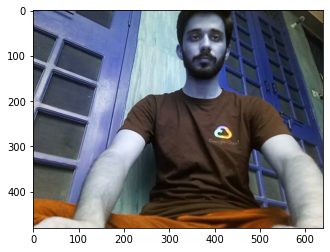

In [ ]:
img=cv2.imread('photos.jpg', cv2.IMREAD_UNCHANGED)
plt.imshow(img)
plt.imsave('photos.jpg', img)
deeplab_model = load_model()
foreground, bin_mask = remove_background(deeplab_model, '/content/drive/My Drive/Virtual Dressing/ACGPN/photos.jpg')
final_image = custom_background('/content/drive/My Drive/Virtual Dressing/ACGPN/background.jpg', foreground)

/content/drive/My Drive/Virtual Dressing/ACGPN/inputs/img
/content/drive/My Drive/Virtual Dressing/ACGPN/inputs
/content/drive/My Drive/Virtual Dressing/ACGPN


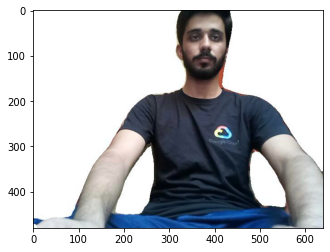

In [ ]:
%cd inputs/img
final_image.save("final.jpg")
img_f=cv2.imread('final.jpg', cv2.IMREAD_UNCHANGED)
!rm -rf final.jpg
plt.imshow(img_f)
plt.imsave('photos.jpg', img_f)
%cd ..
%cd ..


In [92]:
%cd inputs/img
from google.colab import files
uploaded = files.upload()
%cd ..
%cd ..

/content/drive/MyDrive/Virtual Dressing/ACGPN/inputs/img


Saving Arshdeep-Singh-4.jpg to Arshdeep-Singh-4.jpg
/content/drive/MyDrive/Virtual Dressing/ACGPN/inputs
/content/drive/MyDrive/Virtual Dressing/ACGPN


In [93]:
cloth_name = '000001_1.png'
cloth_path = os.path.join('inputs/cloth', sorted(os.listdir('inputs/cloth'))[0])
cloth = Image.open(cloth_path)
cloth = cloth.resize((192, 256), Image.BICUBIC).convert('RGB')
cloth.save(os.path.join('Data_preprocessing/test_color', cloth_name))

u2net_run.infer(u2net, 'Data_preprocessing/test_color', 'Data_preprocessing/test_edge')

Generating mask for: 000001_1.png
Saving output at Data_preprocessing/test_edge/000001_1.png


In [94]:
sorted(os.listdir('inputs/img'))

['Arshdeep-Singh-4.jpg']

In [95]:
import time

start_time = time.time()
img_name = '000001_0.png'
img_path = os.path.join('inputs/img', sorted(os.listdir('inputs/img'))[0])
img = Image.open(img_path)
img = img.resize((192,256), Image.BICUBIC)

img_path = os.path.join('Data_preprocessing/test_img', img_name)
img.save(img_path)
resize_time = time.time()
print('Resized image in {}s'.format(resize_time-start_time))

!python3 Self-Correction-Human-Parsing-for-ACGPN/simple_extractor.py --dataset 'lip' --model-restore 'lip_final.pth' --input-dir 'Data_preprocessing/test_img' --output-dir 'Data_preprocessing/test_label'
parse_time = time.time()
print('Parsing generated in {}s'.format(parse_time-resize_time))

pose_path = os.path.join('Data_preprocessing/test_pose', img_name.replace('.png', '_keypoints.json'))
generate_pose_keypoints(img_path, pose_path)
pose_time = time.time()
print('Pose map generated in {}s'.format(pose_time-parse_time))

Resized image in 0.05400681495666504s
100% 1/1 [00:01<00:00,  1.69s/it]
Parsing generated in 7.510986328125s
File saved at Data_preprocessing/test_pose/000001_0_keypoints.json
Pose map generated in 1.1586894989013672s


In [96]:
!rm -rf Data_preprocessing/test_pairs.txt
with open('Data_preprocessing/test_pairs.txt','w') as f:
    f.write('000001_0.png 000001_1.png')

In [97]:
!python test.py

?
------------ Options -------------
aspect_ratio: 1.0
batchSize: 1
checkpoints_dir: ./checkpoints
cluster_path: features_clustered_010.npy
continue_train: False
data_type: 32
datapairs: test_pairs.txt
dataroot: Data_preprocessing/
display_winsize: 512
engine: None
export_onnx: None
fineSize: 512
gpu_ids: [0]
how_many: 1000
input_nc: 3
isTrain: False
label_nc: 20
loadSize: 512
max_dataset_size: inf
model: pix2pixHD
nThreads: 1
n_blocks_global: 4
n_blocks_local: 3
n_downsample_global: 4
n_local_enhancers: 1
name: label2city
netG: global
ngf: 64
niter_fix_global: 0
no_flip: False
norm: instance
ntest: inf
onnx: None
output_nc: 3
phase: test
resize_or_crop: scale_width
results_dir: ./results/
serial_batches: True
tf_log: False
use_dropout: False
use_encoded_image: False
verbose: False
which_epoch: latest
-------------- End ----------------
CustomDatasetDataLoader
dataset [AlignedDataset] was created
Data_preprocessing/test_label label
Data_preprocessing/test_img img
Data_preprocessing/tes

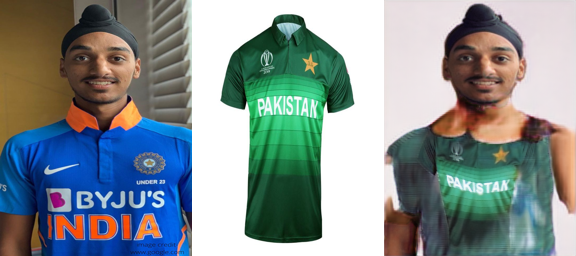

In [98]:
output_grid = np.concatenate([np.array(Image.open('Data_preprocessing/test_img/000001_0.png')),
                np.array(Image.open('Data_preprocessing/test_color/000001_1.png')),
                np.array(Image.open('results/test/try-on/000001_0.png'))], axis=1)
image_grid = Image.fromarray(output_grid)
image_grid

### Check results in 'results' folder!

**Deleting all images**

In [88]:
!rm -rf Data_preprocessing/test_color/*
!rm -rf Data_preprocessing/test_colormask/*
!rm -rf Data_preprocessing/test_edge/*
!rm -rf Data_preprocessing/test_img/*
!rm -rf Data_preprocessing/test_label/*
!rm -rf Data_preprocessing/test_mask/*
!rm -rf Data_preprocessing/test_pose/*
!rm -rf inputs/cloth/*
!rm -rf inputs/img/*

In [89]:
!rm -rf results/*
!rm -rf photos.jpg

In [90]:
cd /content/drive/MyDrive/Virtual Dressing/ACGPN

/content/drive/MyDrive/Virtual Dressing/ACGPN
